In [1]:
%load_ext autoreload
%autoreload complete

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib_inline.backend_inline import set_matplotlib_formats
from tqdm.notebook import tqdm

from src.cache import cache

set_matplotlib_formats("svg")

In [1]:
from src.models.propensity_scores.nlp.basic import f1_lr, f1_random, f1_ts, get_data

features = []  # ["size", "ewm"]
treatment = "occ_protest"
f1_random(treatment=treatment)
f1_ts(add_features=features, treatment=treatment)
f1_lr(add_features=features, treatment=treatment)
f1_lr(add_features=features, treatment=treatment, balanced=True)
df = get_data(add_features=features, treatment=treatment).X_ts
df.columns

Cross-validated F1 score: 0.000 +/- 0.000
Cross-validated F1 score: 0.000 +/- 0.000
Cross-validated F1 score: 0.207 +/- 0.050


Index(['weekday_Friday_lag0'], dtype='object')

In [2]:
from src.models.propensity_scores.nlp.basic import (
    f1_augmented,
    f1_combi,
    f1_text,
    f1_ts,
)

f1_ts()
f1_text(cutoff=1000)
f1_combi(cutoff=1000)
f1_augmented(cutoff=1000)

Cross-validated F1 score: 0.223 +/- 0.017
Cross-validated F1 score: 0.099 +/- 0.032
Cross-validated F1 score: 0.139 +/- 0.045
Cross-validated F1 score: 0.142 +/- 0.043


In [1]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-german-cased")

In [ ]:
from src.models.propensity_scores.nlp.basic import get_data

d = get_data()
texts = d._X_text["text_lag0"]

In [ ]:
import re
from pprint import pprint

from src.models.propensity_scores.nlp.kwic import kwic

regex = re.compile(r"klima|climate|protest", re.IGNORECASE)

texts = texts.sample(100).apply(lambda text: kwic(text, regex, n=0))
pprint(texts.sample(5).tolist())

<Axes: >

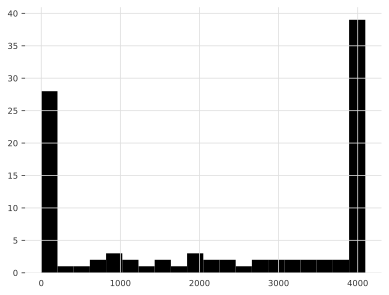

In [11]:
(
    texts.sample(100)
    .apply(lambda x: len(tokenizer.tokenize(x)))
    .clip(0, 4096)
    .hist(bins=20)
)

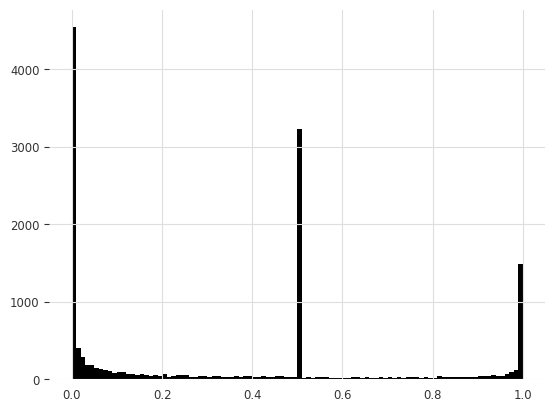

In [8]:
import matplotlib.pyplot as plt

from src.models.propensity_scores.nlp.basic import get_text_probas

X_text_proba = get_text_probas(cutoff=500)
plt.hist(X_text_proba[:, 1], bins=100)
plt.show()

In [13]:
proba = X_text_proba[:, 0]
sum((proba < 0.95) & (proba > 0.5)) / len(proba)

In [ ]:
df["text_lag-1"].str.split().str.len().describe()

count    14157.000000
mean      2054.008264
std       1394.894754
min          0.000000
25%        873.000000
50%       2008.000000
75%       2954.000000
max       7889.000000
Name: text_lag-1, dtype: float64

In [7]:
from src.features.aggregation import all_regions

{name: df["occ_protest"].iloc[:60].sum() for name, df in all_regions(ignore_group=True)}

{'Bayern': 14,
 'Berlin': 9,
 'Brandenburg': 0,
 'Hamburg': 9,
 'Hessen': 7,
 'Niedersachsen': 7,
 'Nordrhein-Westfalen': 16,
 'Rheinland-Pfalz': 2,
 'Saarland': 0,
 'Sachsen': 2,
 'Sachsen-Anhalt': 1,
 'Schleswig-Holstein': 3,
 'Thüringen': 6}

In [3]:
from src.models.propensity_scores.nlp.basic import get_data

d = get_data()
d._X_text["text_lag0"].sample(5).tolist()

['',
 '',
 'So wird ein Hassbürger zum Mörder\n\nRechtsextreme Gewalt ist die größte Gefahr für die innere Sicherheit Deutschlands. Diese Gewalt entsteht aus einem Klima von Hass und Hetze gegen Ausländer, gegen religiöse Minderheiten und gegen verantwortliche Politiker. So werden potenzielle Täter ermutigt, zu handeln. So werden aus Wutbürgern Hassbürger und schließlich Mörder. Die Sicherheitsbehörden haben das erkannt. Sie bekamen mehr Stellen und es gibt neue Gesetze gegen Hass im Internet.\n\n---\n\n"Rassismus ist ein Gift, Hass ist ein Gift"\n\nDie AfD bezeichnete Klingbeil dabei als "politischen Arm der extremen Rechten". Von der AfD ausgehende Tabubrüche seien nicht mehr akzeptabel, so der SPD-General. "Wir werden nicht hinnehmen, dass das gesellschaftliche Klima sich weiter vergiftet." Auch für CDU-Chefin Annegret Kramp-Karrenbauer zeigt die Gewalttat von Hanau, wie nötig eine "Brandmauer" gegen die AfD ist. Sie fühle sich in ihrer Haltung bestärkt, dass es keine Zusammenarbeit

In [1]:
from src.models.propensity_scores.nlp.embeddings import (
    f1_embeddings,
    precision_recall_curve,
)

f1_embeddings(cutoff=200)
# precision_recall_curve()

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for de

0it [00:00, ?it/s]

Model trained


  0%|          | 0/4000 [00:00<?, ?it/s]

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

Cross-validated F1 score: 0.139 +/- 0.084


input lenghts:

- electra: 128 tokens
- bert: 512 tokens
- llama 2: 4096 tokens